In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('Advertising.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
def generate_power_n_features(x, n):
    T = PolynomialFeatures(n, interaction_only=False, include_bias=False)
    return T.fit_transform(x)

In [5]:
def train(x, y, max_degree):
    results = []
    for i in range(1, max_degree+1):
        x_prime = generate_power_n_features(x, i)
        model = LinearRegression(fit_intercept=True)
        model.fit(x_prime, y.reshape(-1,1))
        p = model.predict(x_prime)
        results.append({'model': model, 
                        'd': i, 
                        'r2': model.score(x_prime, y.reshape(-1,1)),
                        'err': mean_absolute_error(y.reshape(-1,1), p)})
    return results

In [6]:
# x = df.loc[:, ['TV', 'radio', 'newspaper']].values
x = df.drop('sales', axis=1).values
y = df['sales'].values.reshape(-1,1)

In [7]:
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 3) (160, 1)
(40, 3) (40, 1)


In [9]:
res = train(x_train, y_train, 6)

In [10]:
errors_test = []
for item in res:
    m = item['model']
    x_t_prime = generate_power_n_features(x_test, item['d'])
    p = m.predict(x_t_prime)
    err = mean_absolute_error(y_test.reshape(-1,1), p)
    errors_test.append(err)
    print(f"{item['d']} - R2: {item['r2']:.4f} - err: {item['err']:.1f} - err test: {err:.1f}")

1 - R2: 0.9061 - err: 1.2 - err test: 1.4
2 - R2: 0.9855 - err: 0.4 - err test: 0.4
3 - R2: 0.9921 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
5 - R2: 0.9978 - err: 0.2 - err test: 0.4
6 - R2: 0.9984 - err: 0.2 - err test: 2.9


In [11]:
errors_train = [item['err'] for item in res]

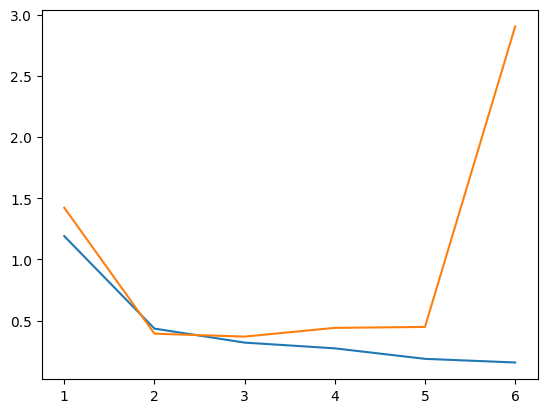

In [12]:
plt.plot(np.arange(1,len(res)+1), errors_train);
plt.plot(np.arange(1,len(res)+1), errors_test);

In [45]:
m = res[2]['model']

In [46]:
m.coef_

array([[ 1.43744542e-01,  1.16889571e-01, -9.01388091e-03,
        -6.56029286e-04,  3.09464049e-03,  4.59412248e-04,
         1.22294251e-06, -3.43846800e-05, -5.40437198e-06]])

# Regularization  
- Penalty
- Norm
    - L1 -> Lasso
    - L2 -> Ridge

In [13]:
res


[{'model': LinearRegression(),
  'd': 1,
  'r2': 0.9060654158118097,
  'err': 1.1901121406324937},
 {'model': LinearRegression(),
  'd': 2,
  'r2': 0.9855258536437211,
  'err': 0.4344341524668639},
 {'model': LinearRegression(),
  'd': 3,
  'r2': 0.9920505748058244,
  'err': 0.3200191432227387},
 {'model': LinearRegression(),
  'd': 4,
  'r2': 0.9950791407443585,
  'err': 0.2731491779353743},
 {'model': LinearRegression(),
  'd': 5,
  'r2': 0.9978287922380986,
  'err': 0.1873643245186914},
 {'model': LinearRegression(),
  'd': 6,
  'r2': 0.9984136616938267,
  'err': 0.15765186379932625}]

In [15]:
model6 = res[-1]['model']
err6 = res[-1]['err']
r2_6 = res[-1]['r2']
err_test_6 = errors_test[-1]

In [18]:
print(f"D = 6\nerror train = {err6:.4f}\nerror test = {err_test_6:.4f}\nr2 = {r2_6:.4f}")

D = 6
error train = 0.1577
error test = 2.9036
r2 = 0.9984


In [32]:
def train_ridge(x, y, degrees, alphas):
    results = []
    for i in degrees:
        x_prime = generate_power_n_features(x, i)
        for a in alphas:
            model = Ridge(alpha=a, fit_intercept=True)
            model.fit(x_prime, y.reshape(-1,1))
            p = model.predict(x_prime)
            results.append({'model': model, 
                            'd': i,
                            'alpha': a,
                            'r2': model.score(x_prime, y.reshape(-1,1)),
                            'err': mean_absolute_error(y.reshape(-1,1), p)})
    return results

In [40]:
res = train_ridge(x_train, y_train, [4], [0.1, 1, 5, 10, 20, 30, 100, 10000])

/home/ryn/.virtualenvs/anisa_ds/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.15066e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ryn/.virtualenvs/anisa_ds/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.24917e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ryn/.virtualenvs/anisa_ds/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.68816e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ryn/.virtualenvs/anisa_ds/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.23938e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/hom

In [41]:
errors_test = []
for item in res:
    m = item['model']
    x_t_prime = generate_power_n_features(x_test, item['d'])
    p = m.predict(x_t_prime)
    err = mean_absolute_error(y_test.reshape(-1,1), p)
    errors_test.append(err)
    print(f"{item['d']} - R2: {item['r2']:.4f} - err: {item['err']:.1f} - err test: {err:.1f}")

4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9950 - err: 0.3 - err test: 0.4
4 - R2: 0.9893 - err: 0.4 - err test: 0.5


In [35]:
def train_lasso(x, y, degrees, alphas):
    results = []
    for i in degrees:
        x_prime = generate_power_n_features(x, i)
        for a in alphas:
            model = Lasso(alpha=a, fit_intercept=True)
            model.fit(x_prime, y.reshape(-1,1))
            p = model.predict(x_prime)
            results.append({'model': model, 
                            'd': i,
                            'alpha': a,
                            'r2': model.score(x_prime, y.reshape(-1,1)),
                            'err': mean_absolute_error(y.reshape(-1,1), p)})
    return results

In [42]:
res = train_ridge(x_train, y_train, [4], [0.1, 1, 5, 10, 20, 30, 100, 10000])

/home/ryn/.virtualenvs/anisa_ds/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.15066e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ryn/.virtualenvs/anisa_ds/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.24917e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ryn/.virtualenvs/anisa_ds/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.68816e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/ryn/.virtualenvs/anisa_ds/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.23938e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/hom

In [43]:
errors_test = []
for item in res:
    m = item['model']
    x_t_prime = generate_power_n_features(x_test, item['d'])
    p = m.predict(x_t_prime)
    err = mean_absolute_error(y_test.reshape(-1,1), p)
    errors_test.append(err)
    print(f"{item['d']} - R2: {item['r2']:.4f} - err: {item['err']:.1f} - err test: {err:.1f}")

4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9951 - err: 0.3 - err test: 0.4
4 - R2: 0.9950 - err: 0.3 - err test: 0.4
4 - R2: 0.9893 - err: 0.4 - err test: 0.5
